In [1]:
from skimage.measure import block_reduce
import numpy as np

import logging

from utils import logging as lg
lg.set_logging(logging.ERROR)
from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt

from notebook_utils import plot 
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

# Define functions

In [4]:
def get_data_for_class(data_name, class_idx, no=16, seed=2):
    np.random.seed(seed)

    data = dataset_loader.load(data_name)
    indices = np.argmax(data.test2d.y, axis=1) == class_idx
    if no:
        s = np.random.choice(np.sum(indices), size=no, replace=False)
        return data.test2d.x[indices,:,:][s, :, :], data.test2d.y[indices, :][s, :]
    else:
        return data.test2d.x[indices,:,:]

In [5]:
def plot_digits(data, title=""):
    plt.figure(figsize=(80,20))
    for i in range(data.shape[0]):
        plt.subplot(4,16, i+1)
        plt.imshow(data[i,:,:], cmap='gray')
        plt.xticks([])
        plt.yticks([])
    if title:
        plt.suptitle(title)
    plt.show()

In [6]:
# mnist_8_x, mnist_8_y = get_data_for_class('mnist-3-digits', 8, no=16)
# mnist_maj_8_x, mnist_maj_8_y = get_data_for_class('mnist-3-digits-maj', 8, no=16)

# mnist_9_x, mnist_9_y = get_data_for_class('mnist-3-digits', 9, no=16)
# mnist_maj_9_x, mnist_maj_9_y = get_data_for_class('mnist-3-digits-maj', 9, no=16)

# # mnist_9_maj = get_data_for_class('mnist-3-digits-maj', 9)
# # fmnist_ankle_boots = get_data_for_class('fashion-mnist-3-items', 9)

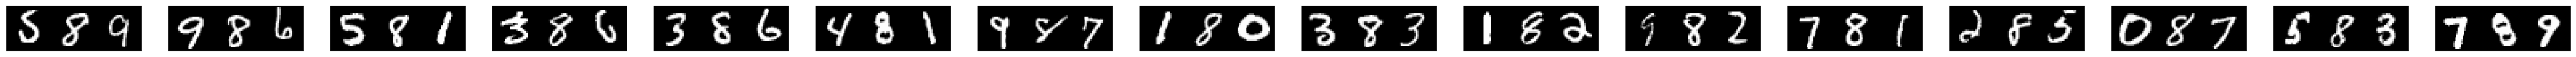

In [7]:
plot_digits(get_data_for_class('mnist-3-digits', 8, no=16)[0])

In [8]:
# plot_digits(get_data_for_class('mnist-7-digits', 2, no=16)[0])

In [9]:
# plot_digits(get_data_for_class('fashion-mnist-7-items', 9, no=16)[0])

In [10]:
dd = dataset_loader.load('mnist-3-digits-maj')

In [11]:
folds = data_provider.build_cvdataset(dd, k=10)

total x shape (70000, 28, 84)
total y shape (70000, 10)
total mark shape (70000, 3)


In [15]:
d1 = folds[0]

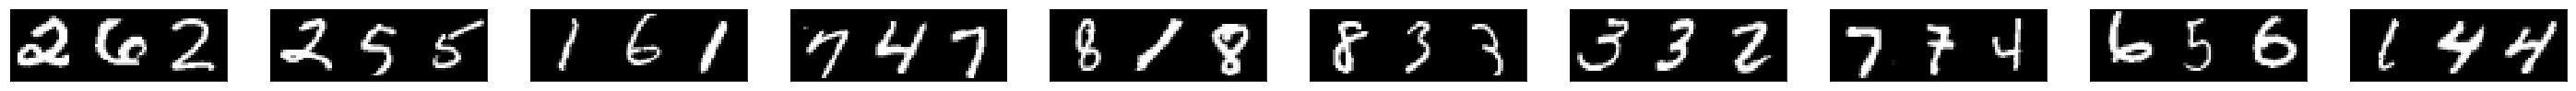

In [20]:
plot_digits(d1[1].x[57:67])

In [21]:
d1[1].y[57:67]

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [22]:
d1[1].correct_digit_mark[57:67]

array([[ True, False,  True],
       [False,  True,  True],
       [ True, False,  True],
       [ True, False,  True],
       [ True, False,  True],
       [False,  True,  True],
       [ True,  True, False],
       [ True,  True, False],
       [ True, False,  True],
       [False,  True,  True]], dtype=bool)